# This notebook is used to explore the datasets

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load data
netflix = pd.read_csv('Data/netflix_titles.csv')
prime = pd.read_csv('Data/amazon_prime_titles.csv')
disney = pd.read_csv('Data/disney_plus_titles.csv')
hulu = pd.read_csv('Data/hulu_titles.csv')
platforms = pd.read_csv('Data/MoviesOnStreamingPlatforms.csv')

In [3]:
# Overview of individual dataframe
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [4]:
# Overview of individual dataframe
disney.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!


In [5]:
# Overview of individual datafra
hulu.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...


In [6]:
# Overview of individual datafr
prime.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...


In [7]:
print('The amount of titles per platform')
print('netflix:',netflix.shape[0])
print('prime:',prime.shape[0])
print('disney:',disney.shape[0])
print('hulu:',hulu.shape[0])

The amount of titles per platform
netflix: 8807
prime: 9668
disney: 1450
hulu: 3073


In [8]:
# Overview of the platform dataframe
platforms

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [5]:
def top_in_attr(dataframe, attribute, count=10):
    df_temp = dataframe.groupby(attribute).count()[['show_id']]
    df_temp.columns = ['count']
    return df_temp.sort_values('count',ascending=False).head(count)

In [10]:
# top 10 netflix directors by count
top_in_attr(netflix,'director')

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12


In [11]:
# Share of Movies vs TV-shows in netflix
top_in_attr(netflix,'type')

,count
type,
Movie,6131
TV Show,2676


In [12]:
top_in_attr(netflix,'country')

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [13]:
top_in_attr(netflix,'release_year')

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


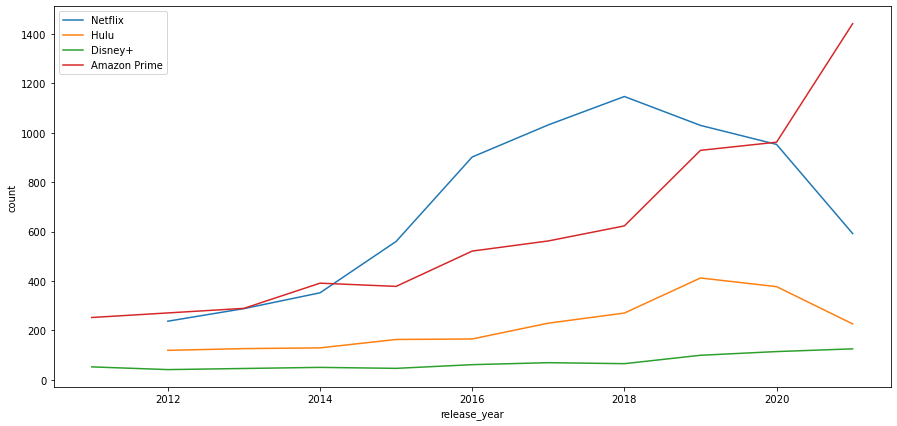

In [18]:
a = top_in_attr(netflix,'release_year')
b = top_in_attr(hulu,'release_year')
c = top_in_attr(disney,'release_year')
d = top_in_attr(prime,'release_year')
plt.figure(figsize=(15, 7))
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=a,
                            legend="brief",
                            label='Netflix')
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=b,
                            label='Hulu',
                            legend="brief")
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=c,
                            label='Disney+',
                            legend="brief")
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=d,
                            label='Amazon Prime',
                            legend="brief")
#plt.legend()
#plt.show()
plt.savefig("Netflix_releases_per_year.png")

In [15]:
top_in_attr(netflix,'rating')

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [16]:
# The unique categories
netflix_categories = netflix['listed_in'].str.split(',').explode('listed_in').unique()
netflix_categories

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [17]:
#netflix categories grouped
a = netflix['listed_in'].str.split(',').explode('listed_in')
b = pd.DataFrame(a.groupby(a).count())
b.columns = ['count']
b['category'] = b.index
c = b.sort_values('count', ascending=False)[:20]

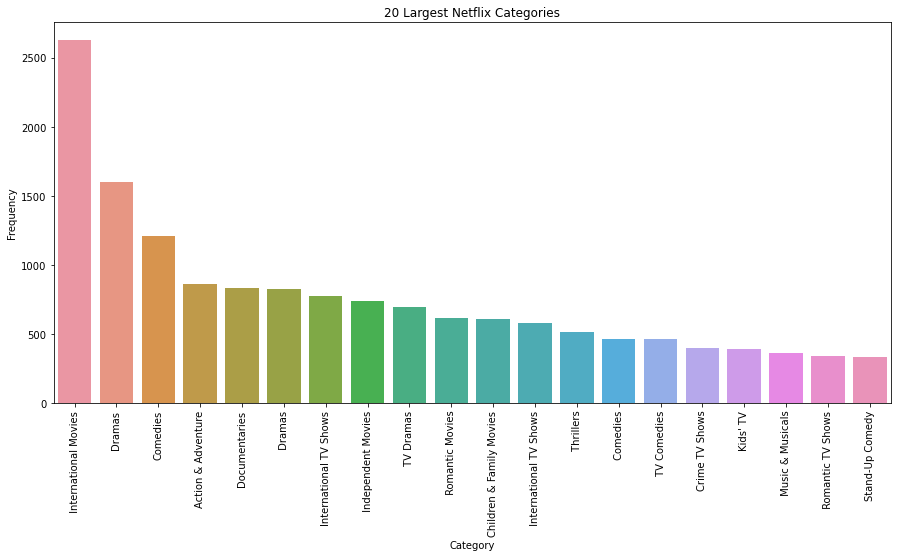

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='count', data=c)
plt.title('20 Largest Netflix Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Adding information from IMDb

In [23]:
#Merge together all datasets of netflix, prime, disney and hulu
all_streams=pd.concat([netflix,prime,disney,hulu], keys=['netflix', 'prime','disney','hulu']).reset_index()
all_streams.sample(5)

,level_0,level_1,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
13277,prime,4470,s4471,Movie,Bryan Callen: Complicated Apes,Brian Volk-Weiss,Bryan Callen,NaN,NaN,2019,18+,59 min,"Comedy, Special Interest",Bryan Callen records his third special in Chic...
10930,prime,2123,s2124,Movie,In a Lonely Place,Nicholas Ray,"Humphrey Bogart, Gloria Grahame, Frank Lovejoy...",NaN,NaN,1950,13+,93 min,"Drama, Suspense",A potentially violent screenwriter (Humphrey B...
13401,prime,4594,s4595,Movie,Compulsion,Ángel González,"Marina Esteve, Paco Manzanedo, Susana Abaitua,...",NaN,NaN,2020,16+,79 min,"Drama, Horror, Suspense",A fairytale relationship comes to an end when ...
2838,netflix,2838,s2839,TV Show,Ugly Delicious,NaN,"David Chang, Peter Meehan",United States,"March 6, 2020",2020,TV-MA,2 Seasons,Docuseries,All the flavor. None of the BS. Star chef Davi...
22352,hulu,2427,s2428,TV Show,Cake Wars,NaN,NaN,United States,"September 6, 2018",2015,TV-G,4 Seasons,"Cooking & Food, Family, Lifestyle & Culture",Expert bakers go toe-to-toe to see whose cake ...


In [24]:
imdb = pd.read_csv("Data/title.basics.tsv", sep="\t",low_memory=False)
imdb.shape

(8810215, 9)

In [26]:
all_streams_imdb=pd.merge(all_streams,imdb,left_on=["title"],right_on=["originalTitle"],how='left')
all_streams_imdb.shape

(176090, 23)

In [28]:
all_streams_imdb=all_streams_imdb[all_streams_imdb["startYear"].astype("string")==all_streams_imdb["release_year"].astype("string")]
all_streams_imdb.shape

(20941, 23)

In [ ]:
all_streams_imdb.sample(5)

In [29]:
rating = pd.read_csv('Data/title.ratings.tsv', sep="\t")

In [31]:
all_rated=pd.merge(all_streams_imdb,rating,on="tconst",how="left")

In [32]:
all_rated.to_csv("Data/all_IMDB_rated.csv",index=False)

### Using the merged dataset

In [36]:
all_rated = pd.read_csv("Data/all_IMDB_rated.csv")
all_rated.head(50)

,level_0,level_1,show_id,type,title,director,cast,country,date_added,release_year,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,netflix,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,...,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama",7.4,6297.0
1,netflix,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,...,short,Blood & Water,Blood & Water,0,2021,\N,\N,"Drama,Short",NaN,NaN
2,netflix,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,...,tvSeries,Jailbirds New Orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV",6.7,198.0
3,netflix,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,...,tvMiniSeries,Midnight Mass,Midnight Mass,0,2021,2021,450,"Drama,Fantasy,Horror",7.7,99395.0
4,netflix,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,...,tvEpisode,Midnight Mass,Midnight Mass,0,2021,\N,\N,Talk-Show,7.1,36.0
5,netflix,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,...,movie,My Little Pony: A New Generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy",6.9,3323.0
6,netflix,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,...,movie,Sankofa,Sankofa,0,1993,\N,125,Drama,7.0,667.0
7,netflix,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,...,movie,The Starling,The Starling,0,2021,\N,102,"Comedy,Drama",6.3,11801.0
8,netflix,11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,...,tvSeries,Bangkok Breaking,Bangkok Breaking,0,2021,\N,60,"Action,Crime,Drama",5.9,272.0
9,netflix,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,...,movie,Je Suis Karl,Je Suis Karl,0,2021,\N,126,"Drama,Romance,Thriller",5.4,920.0


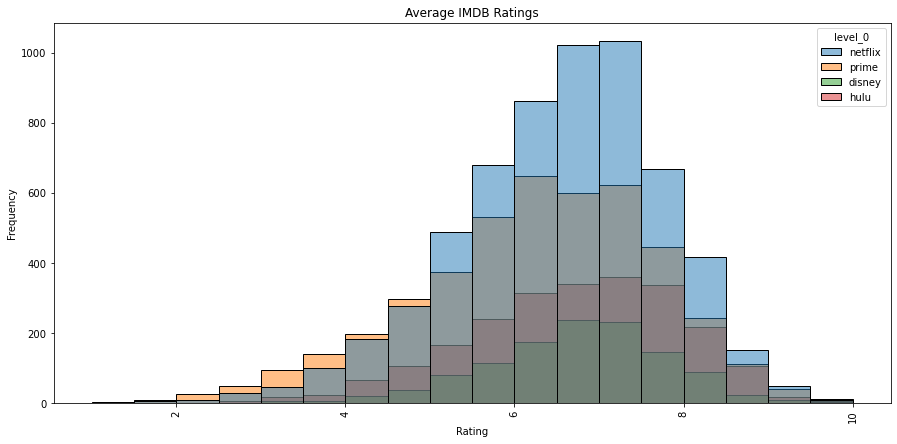

In [34]:
ratings = all_rated[["level_0","averageRating"]]

plt.figure(figsize=(15, 7))
sns.histplot(data=ratings,binwidth=0.5,x="averageRating",hue="level_0",)
plt.title('Average IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()